In [1]:
# Import statements
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('~/datahacks/datasets/dino.csv')

In [3]:
def extract_duration(row):
    """Takes period text and returns the time span"""
    pattern = r'(\d+)-(\d+)'
    match = re.search(pattern, row)
    if match:
        start_year = int(match.group(1))
        end_year = int(match.group(2))
        return np.abs(end_year - start_year)
    else:
        return 

In [4]:
def extract_duration(row):
    """Takes period text and returns the time span"""
    pattern = r'(\d+)-(\d+)'
    match = re.search(pattern, row)
    if match:
        start_year = int(match.group(1))
        end_year = int(match.group(2))
        return np.abs(end_year - start_year)
    else:
        return 

In [5]:
# Create column extract time period
pattern = r'^\w+\s+(\w+)'
df['time_period'] = df['period'].str.extract(pattern)

# Create column extract time span
df['time_span'] = df['period'].apply(extract_duration)

# Drop NaN values
jurassic_cleaned = df.dropna()
jurassic_cleaned.head(2)

,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link,time_period,time_span
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...,Jurassic,10.0
1,abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0m,Dinosauria Saurischia Theropoda Neotheropoda C...,Bonaparte and Novas (1985),comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...,Cretaceous,4.0


In [6]:
countries_continents = { 'Argentina': 'South America', 'Australia': 'Australia', 'Brazil': 'South America',
                        'Canada': 'North America', 'China': 'Asia', 'Egypt': 'Africa', 'France': 'Europe',
                        'Germany': 'Europe', 'India': 'Asia', 'Japan': 'Asia', 'Kazakhstan': 'Asia', 
                        'Lesotho': 'Africa', 'Madagascar': 'Africa', 'Malawi': 'Africa', 'Mongolia': 'Asia',
                        'Morocco': 'Africa', 'Niger': 'Africa', 'North Africa': 'Africa', 'Romania': 'Europe', 
                        'Russia': 'Asia', 'South Africa': 'Africa', 'Spain': 'Europe', 'Tanzania': 'Africa', 
                        'Tunisia': 'Africa', 'USA': 'North America', 'United Kingdom': 'Europe',
                        'Uruguay': 'South America', 'Uzbekistan': 'Asia' } 
jurassic_cleaned['continent'] = jurassic_cleaned['lived_in'].replace(countries_continents)
jurassic_cleaned = jurassic_cleaned.drop(['period', 'named_by', 'link', 'species'], axis = 1)
# know that length is in m
jurassic_cleaned['length'] = jurassic_cleaned['length'].apply(lambda x: float(re.findall(r'\d+\.\d+', x)[0]))

In [7]:
jurassic_cleaned.head()

,name,diet,lived_in,type,length,taxonomy,time_period,time_span,continent
0,aardonyx,herbivorous,South Africa,sauropod,8.0,Dinosauria Saurischia Sauropodomorpha Prosauro...,Jurassic,10.0,Africa
1,abelisaurus,carnivorous,Argentina,large theropod,9.0,Dinosauria Saurischia Theropoda Neotheropoda C...,Cretaceous,4.0,South America
2,achelousaurus,herbivorous,USA,ceratopsian,6.0,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Cretaceous,13.0,North America
3,achillobator,carnivorous,Mongolia,large theropod,5.0,Dinosauria Saurischia Theropoda Neotheropoda T...,Cretaceous,15.0,Asia
4,acrocanthosaurus,carnivorous,USA,large theropod,12.0,Dinosauria Saurischia Theropoda Neotheropoda T...,Cretaceous,10.0,North America


In [8]:
def generate_plots(period, continent):
    """Return list of plots comparing timspan and feature variables"""
    df = jurassic_cleaned[(jurassic_cleaned['time_period'] == period) & (jurassic_cleaned['continent'] == continent)]

    # Set up the figure and axes for subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Plot the bar plot for average time lived by diet
    average_time_lived_diet = df.groupby('diet')['time_span'].mean().reset_index()
    sns.barplot(x='diet', y='time_span', data=average_time_lived_diet, ci=None, ax=axes[0, 0])
    axes[0, 0].set_title('Average Time Existed by Diet')
    axes[0, 0].set_xlabel('Diet')
    axes[0, 0].set_ylabel('Average Time Existed')


    # Plot the bar plot for average time lived by dinosaur type
    average_time_lived_type = df.groupby('type')['time_span'].mean().reset_index()
    sns.barplot(x='type', y='time_span', data=average_time_lived_type, ci=None, ax=axes[0, 1])
    axes[0, 1].set_title('Average Time Lived by Dinosaur Type')
    axes[0, 1].set_xlabel('Dinosaur Type')
    axes[0, 1].set_ylabel('Average Time Existed')
    axes[0, 1].tick_params(axis='x', rotation=45)

    
    # Plot the scatter plot to show correlation between length and time lived, colored by diet
    sns.scatterplot(x='length', y='time_span', hue='diet', data=df, ax=axes[1, 1])
    axes[1, 0].set_title('Length vs Time Existed (Colored by Diet)')
    axes[1, 0].set_xlabel('Length')
    axes[1, 0].set_ylabel('Time Existed')
    axes[1, 0].legend(title='Diet')

    # Plot the scatter plot to show correlation between length and time lived, colored by dinosaur type
    sns.scatterplot(x='length', y='time_span', hue='type', data=df, ax=axes[1, 0])
    axes[1, 1].set_title('Length vs Time Existed (Colored by Dinosaur Type)')
    axes[1, 1].set_xlabel('Length')
    axes[1, 1].set_ylabel('Time Existed')
    axes[1, 1].legend(title='Dinosaur Type')


    # Adjust layout
    plt.tight_layout()
    plt.show()

# Triassic Period

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


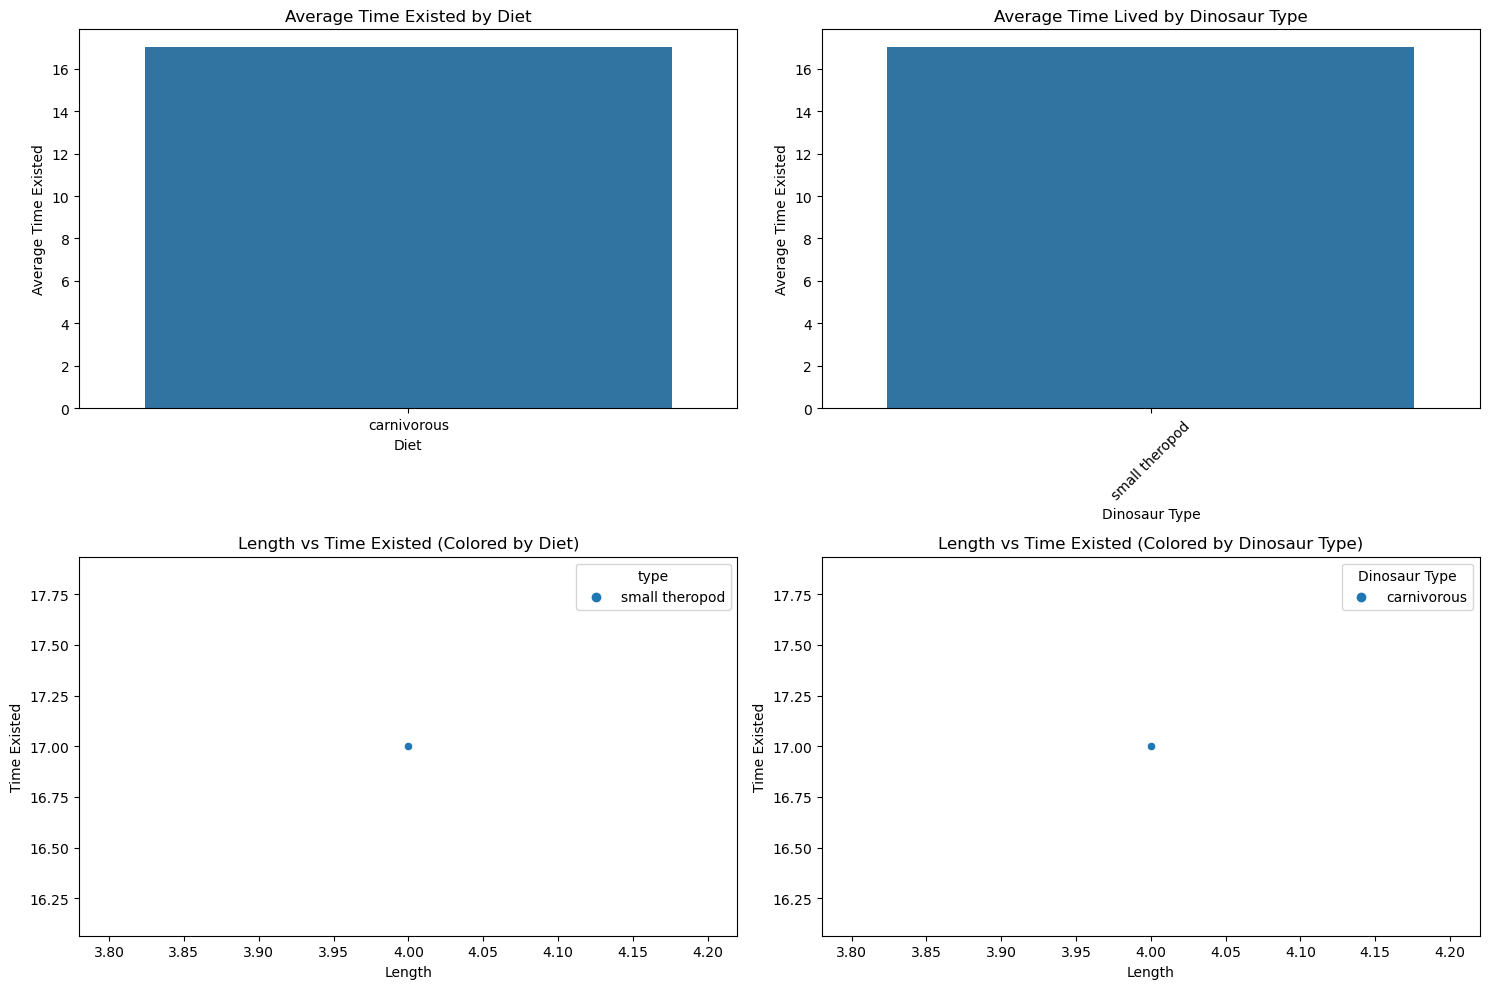

In [9]:
generate_plots('Triassic', 'North America')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


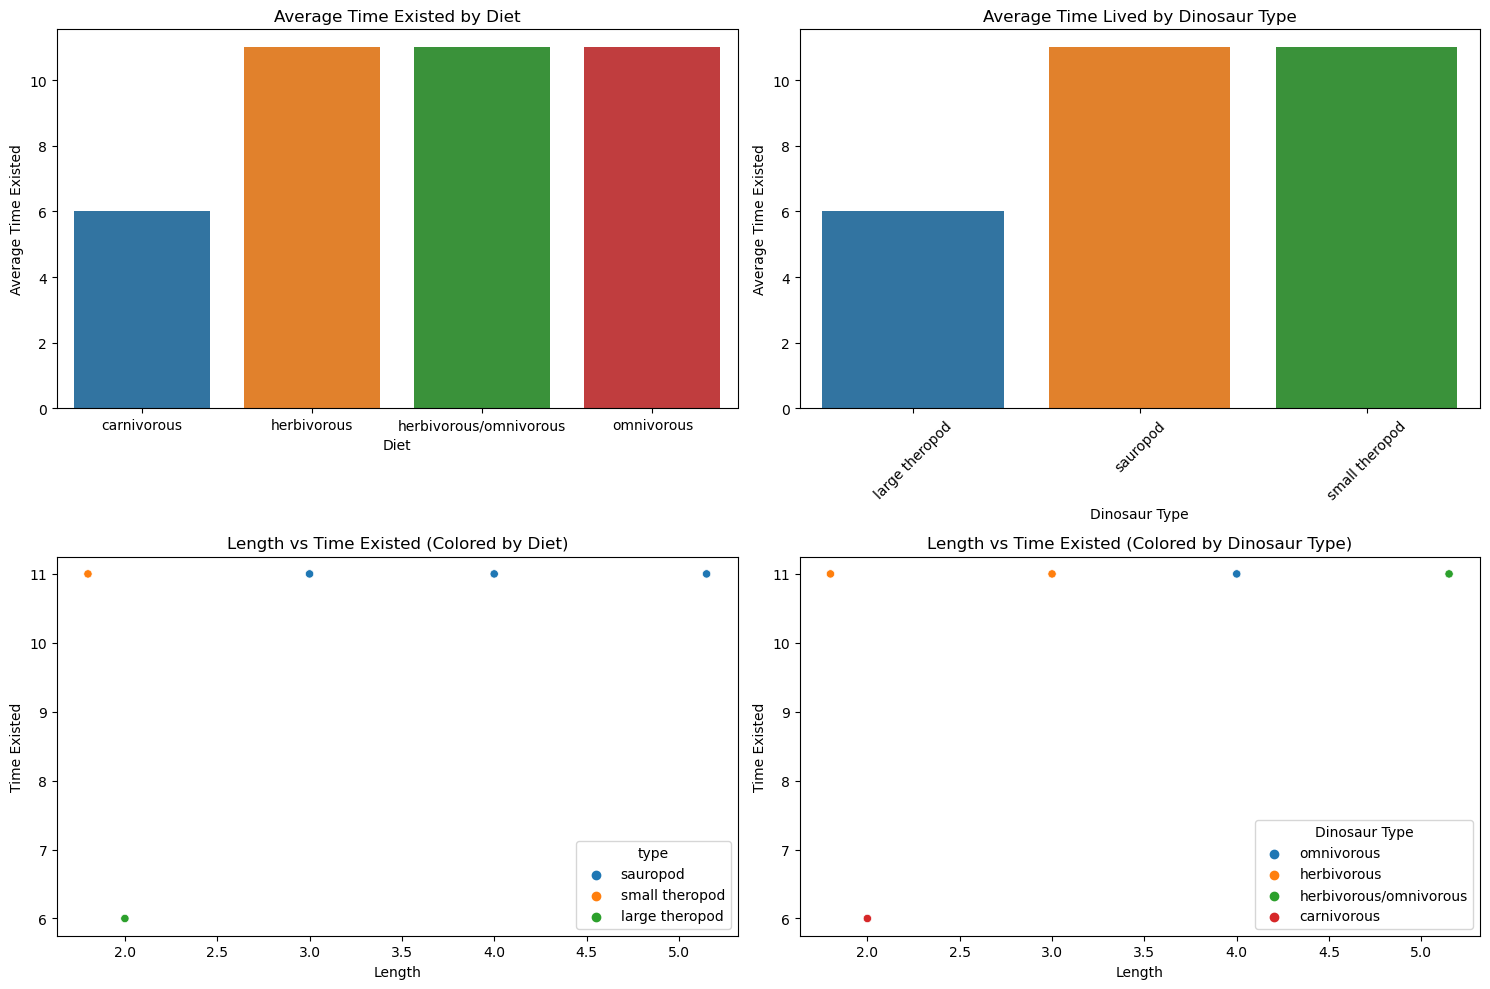

In [10]:
generate_plots('Triassic', 'South America')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


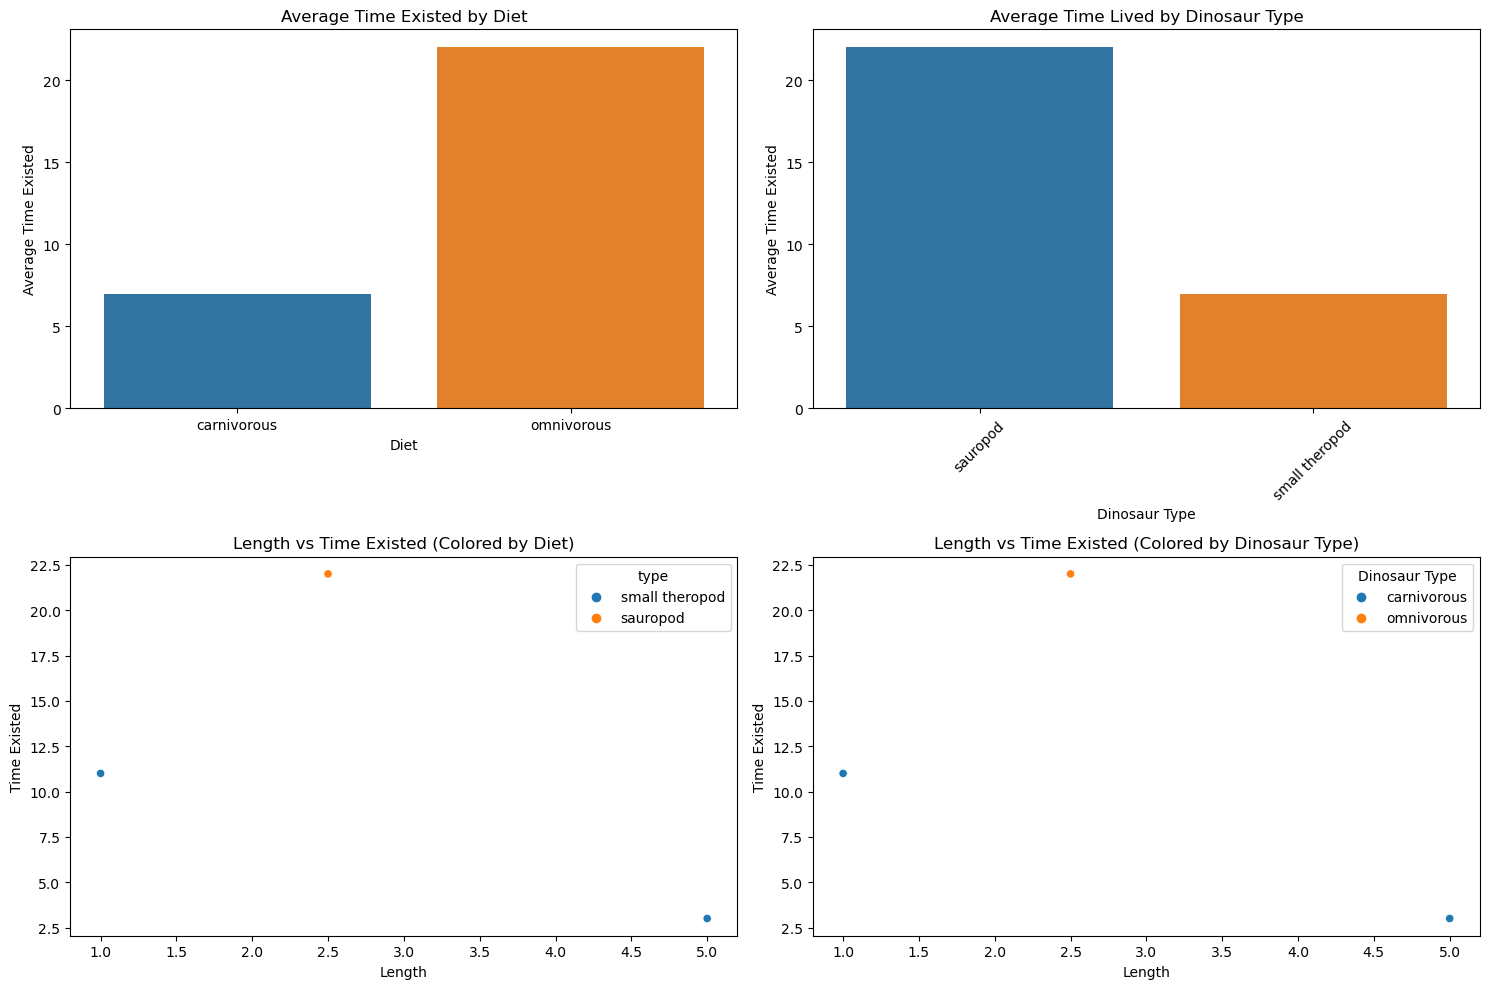

In [11]:
generate_plots('Triassic', 'Europe')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


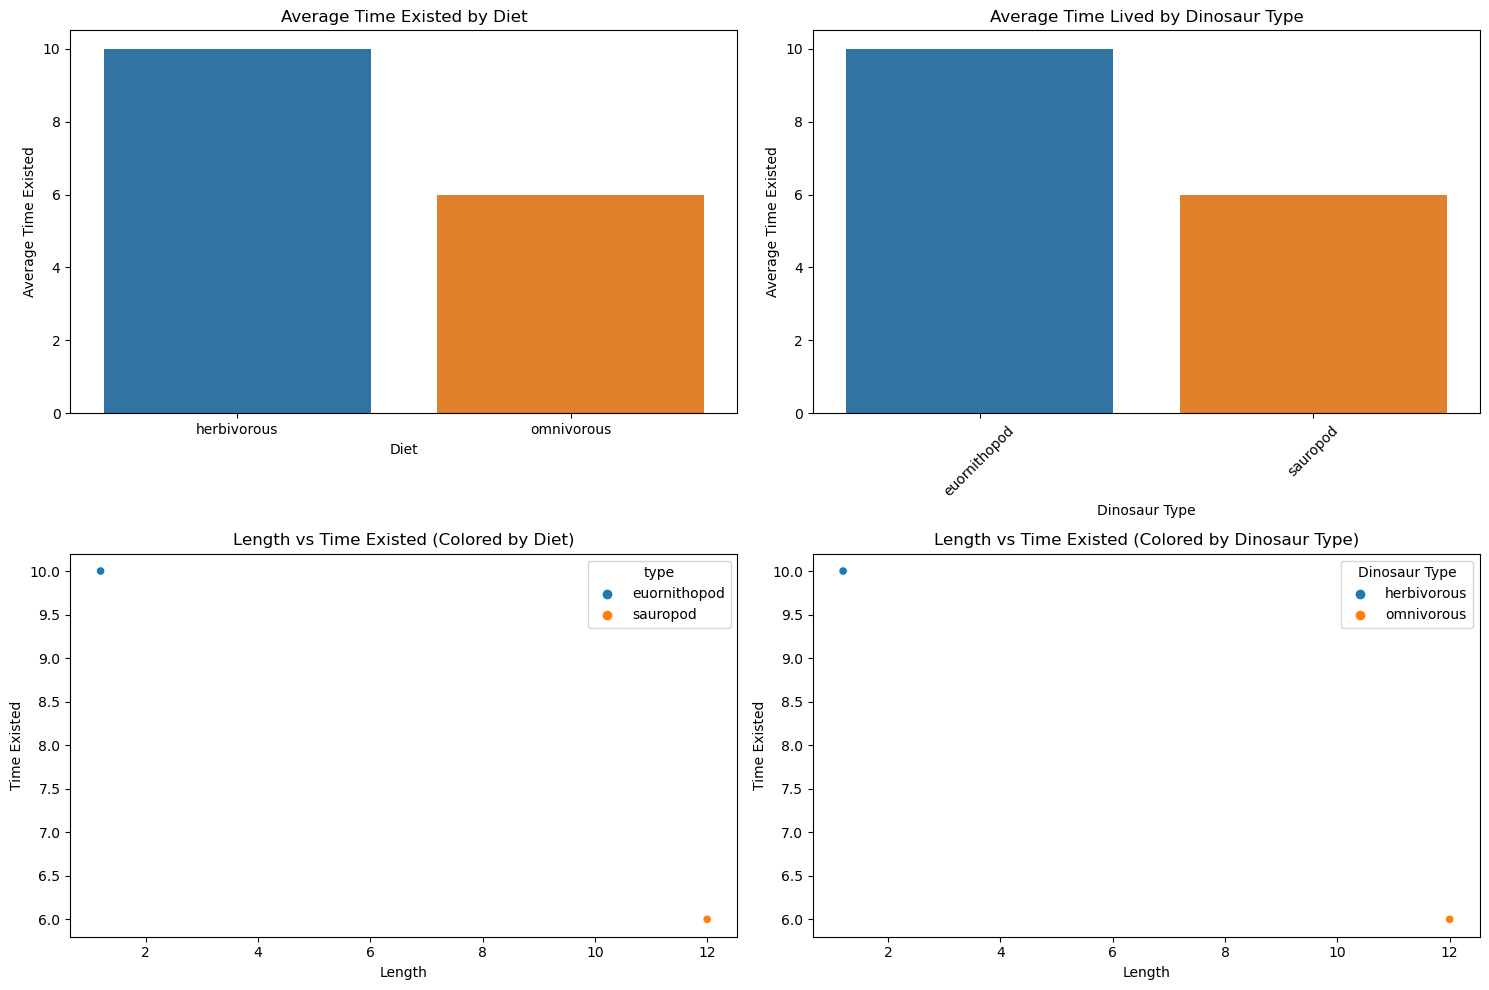

In [12]:
generate_plots('Triassic', 'Africa')

# Jurassic Period

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


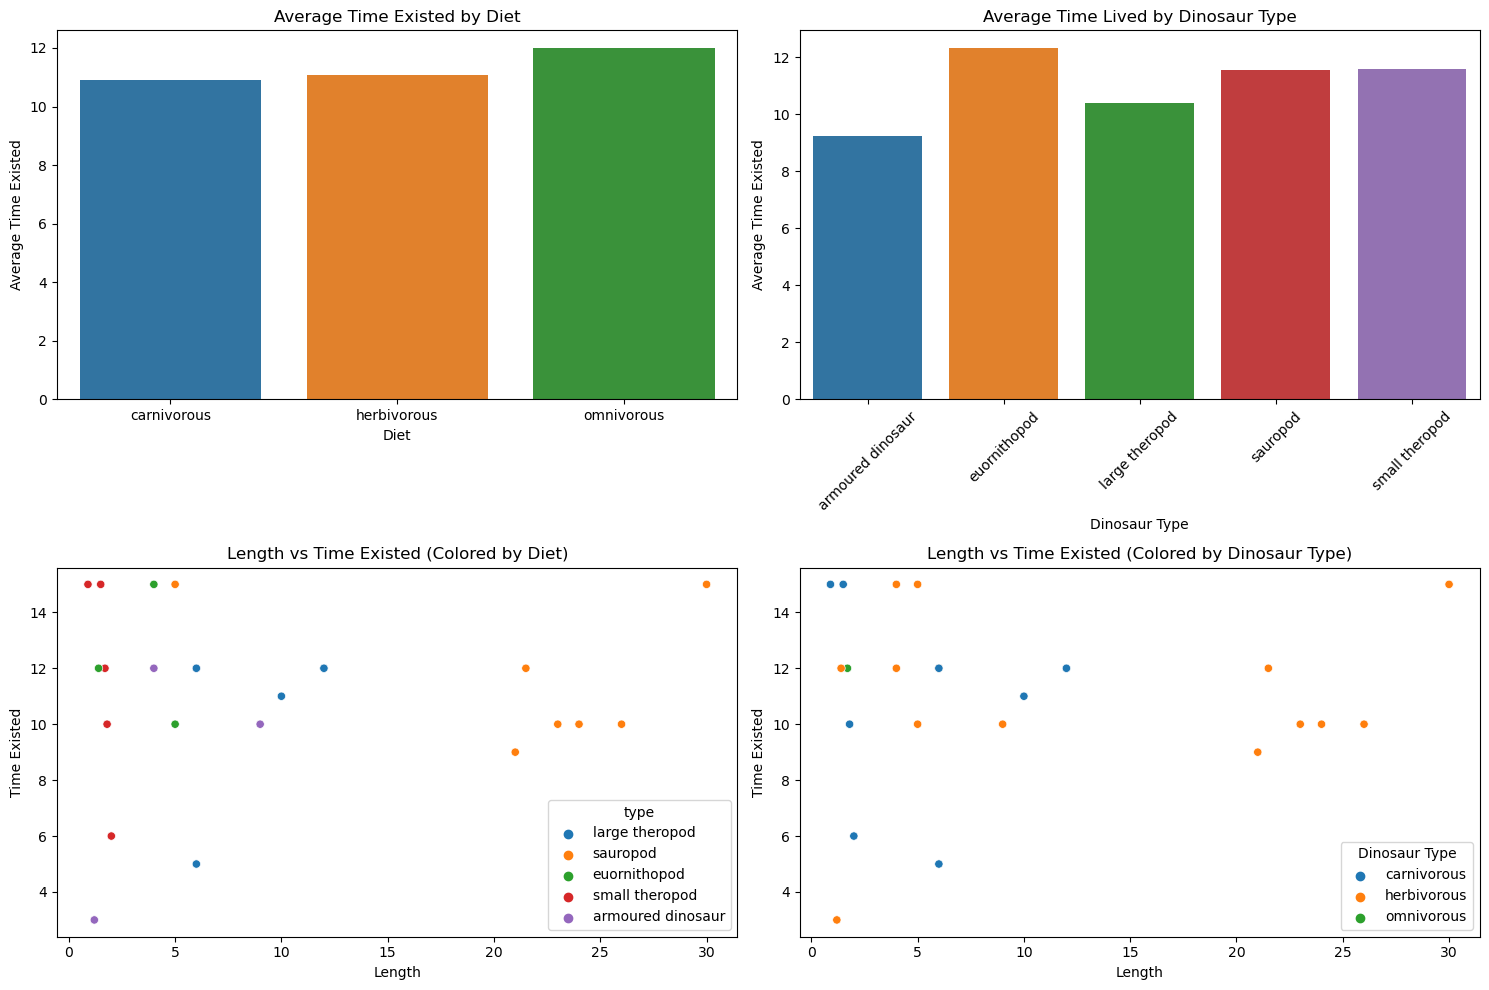

In [13]:
generate_plots('Jurassic', 'North America')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


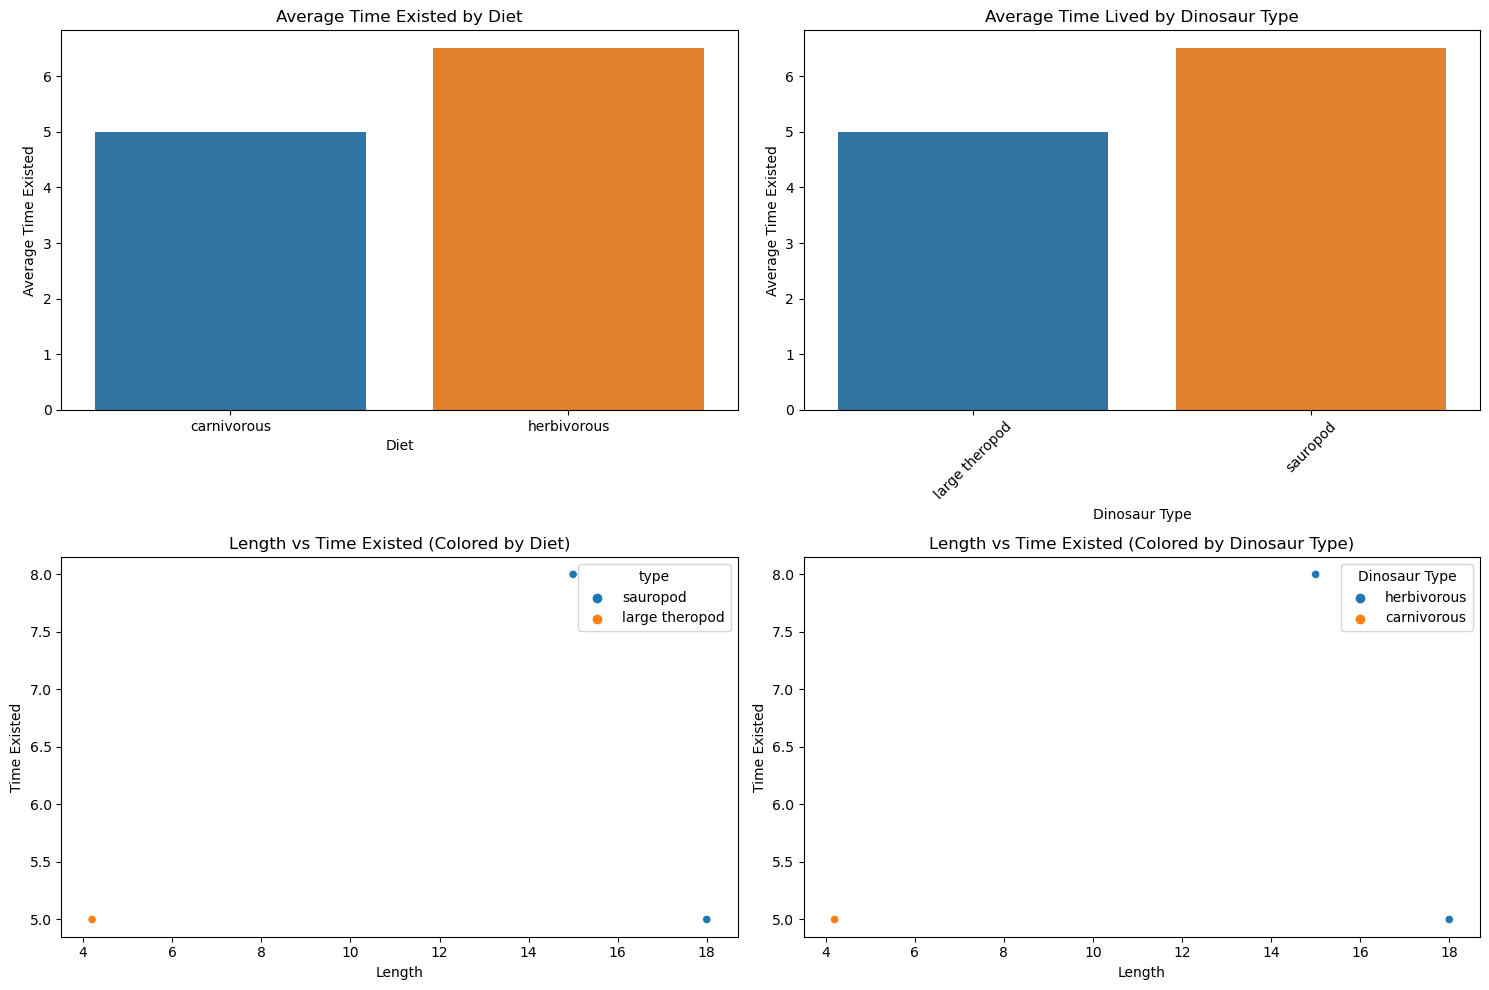

In [14]:
generate_plots('Jurassic', 'South America')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


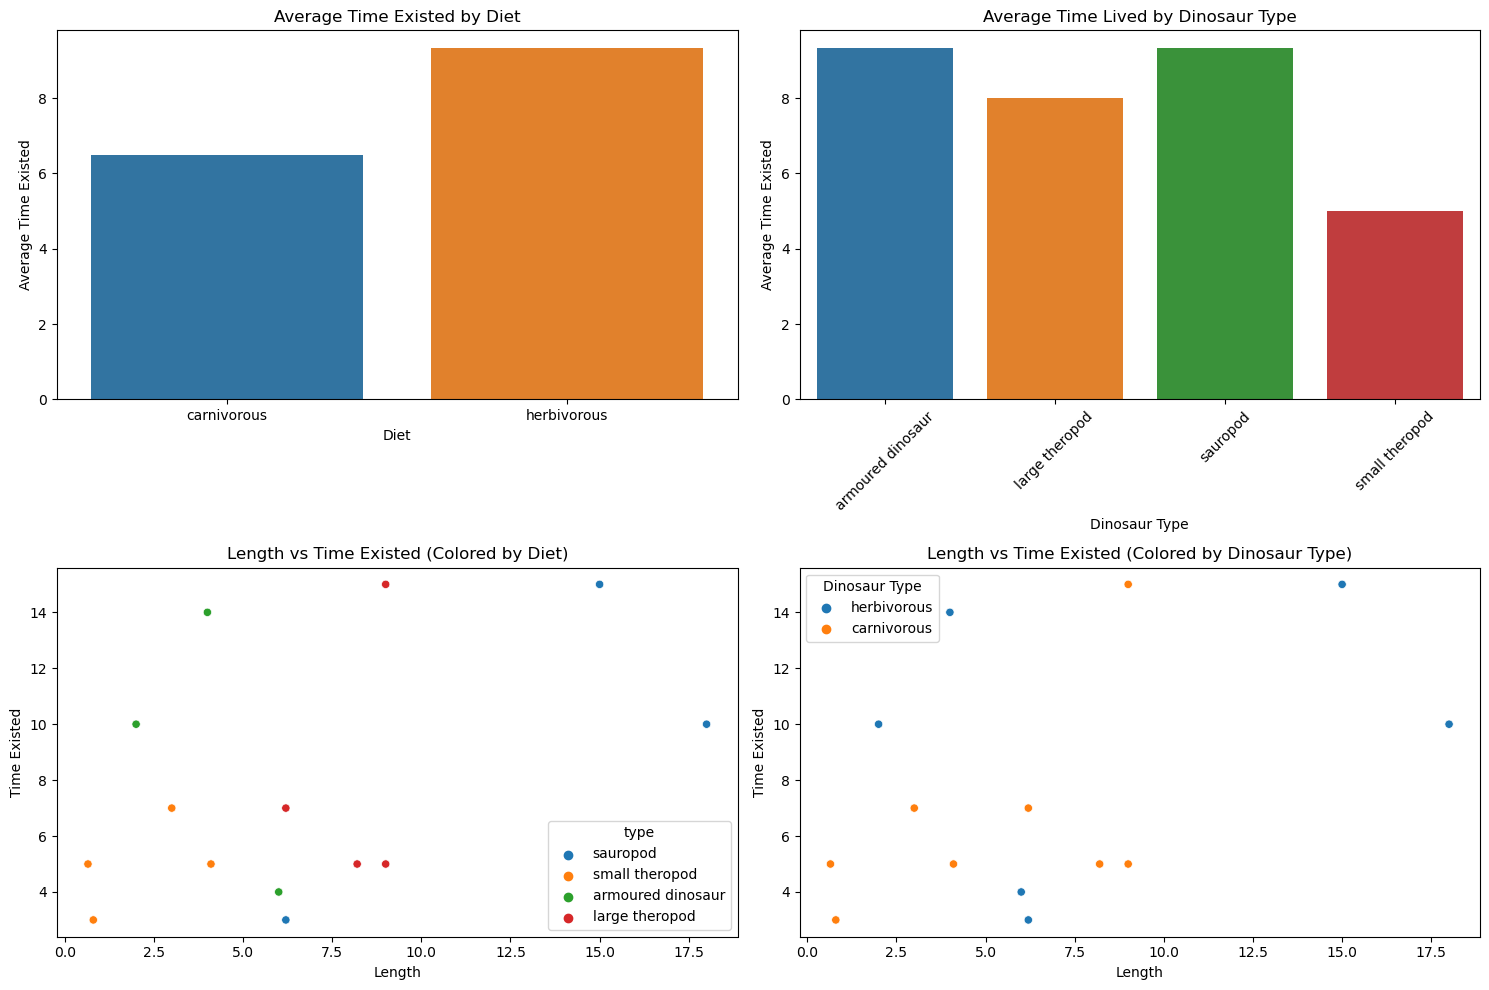

In [15]:
generate_plots('Jurassic', 'Europe')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


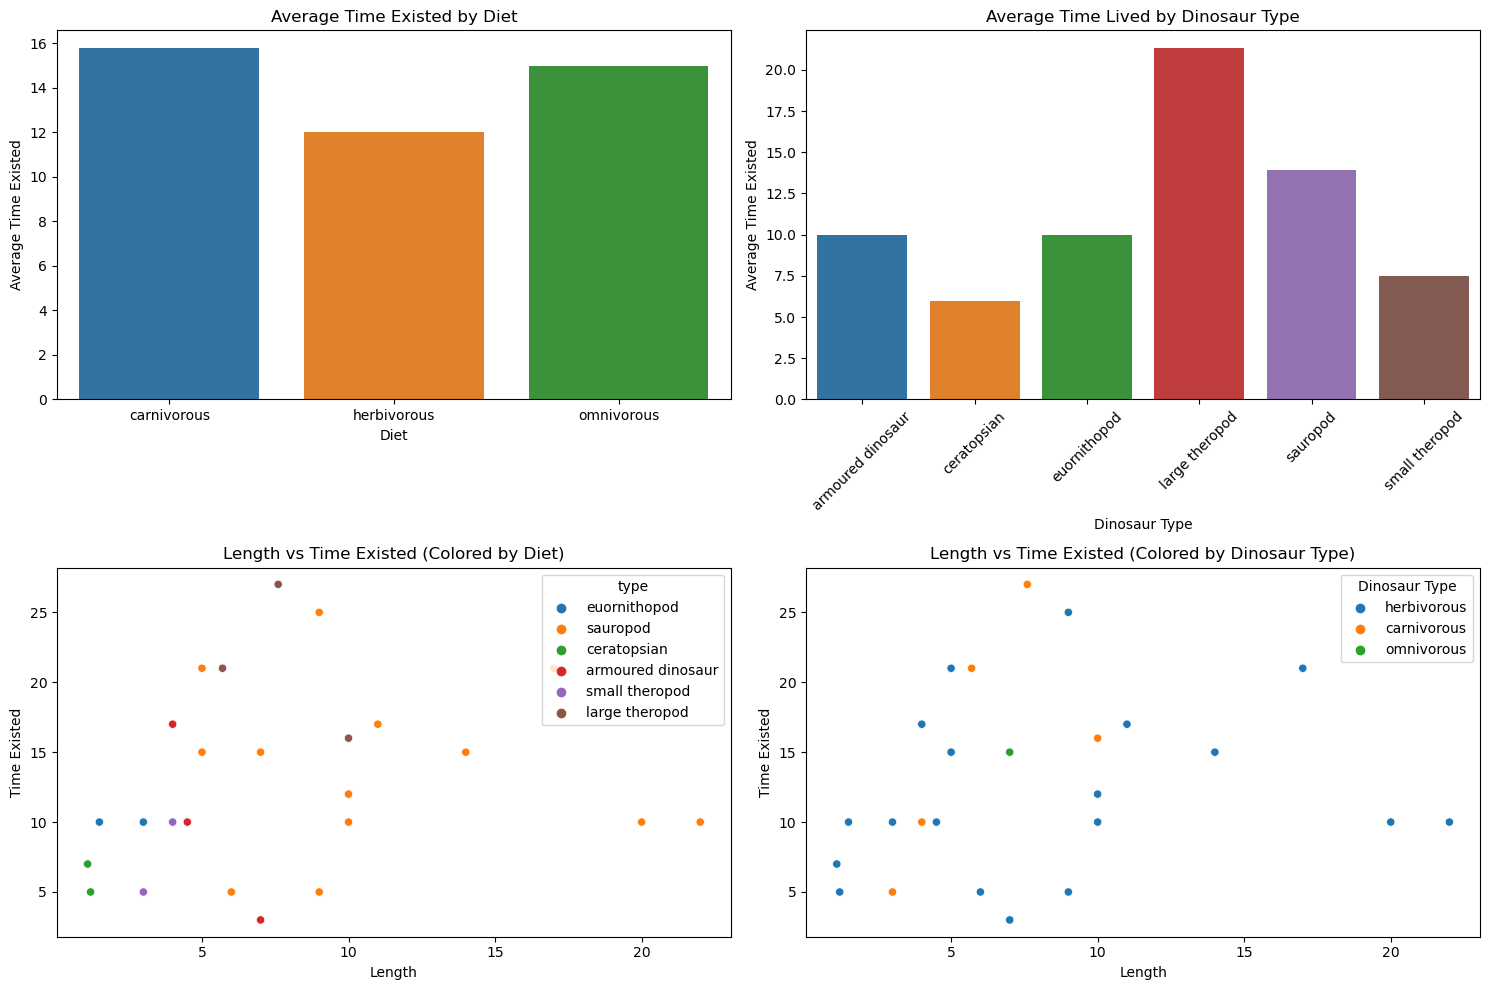

In [16]:
generate_plots('Jurassic', 'Asia')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


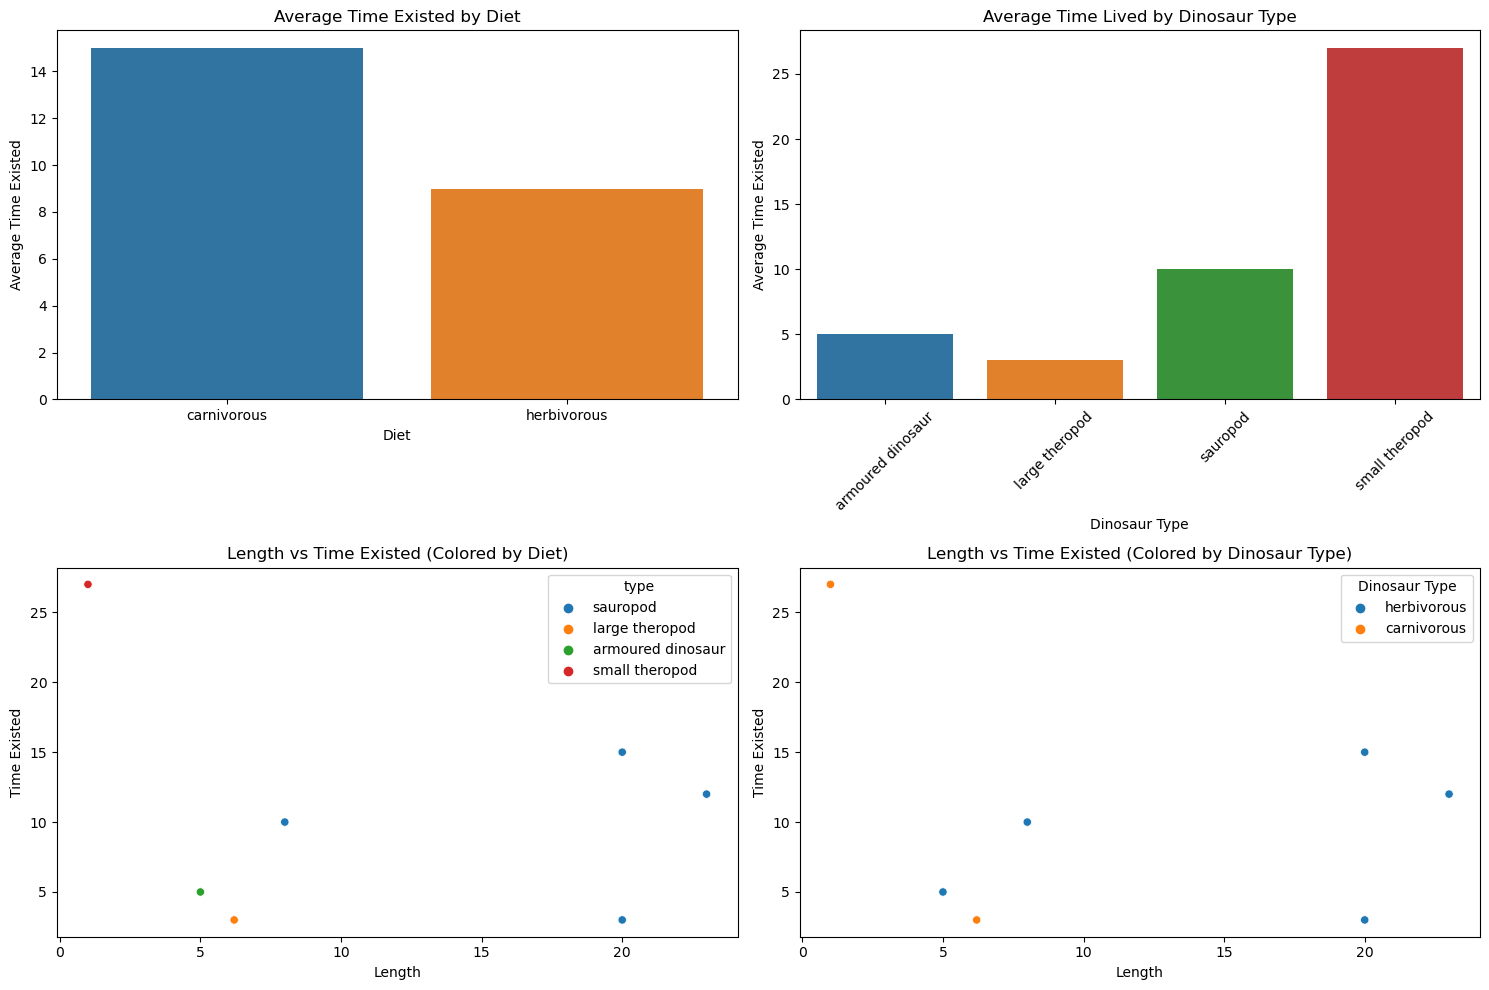

In [17]:
generate_plots('Jurassic', 'Africa')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


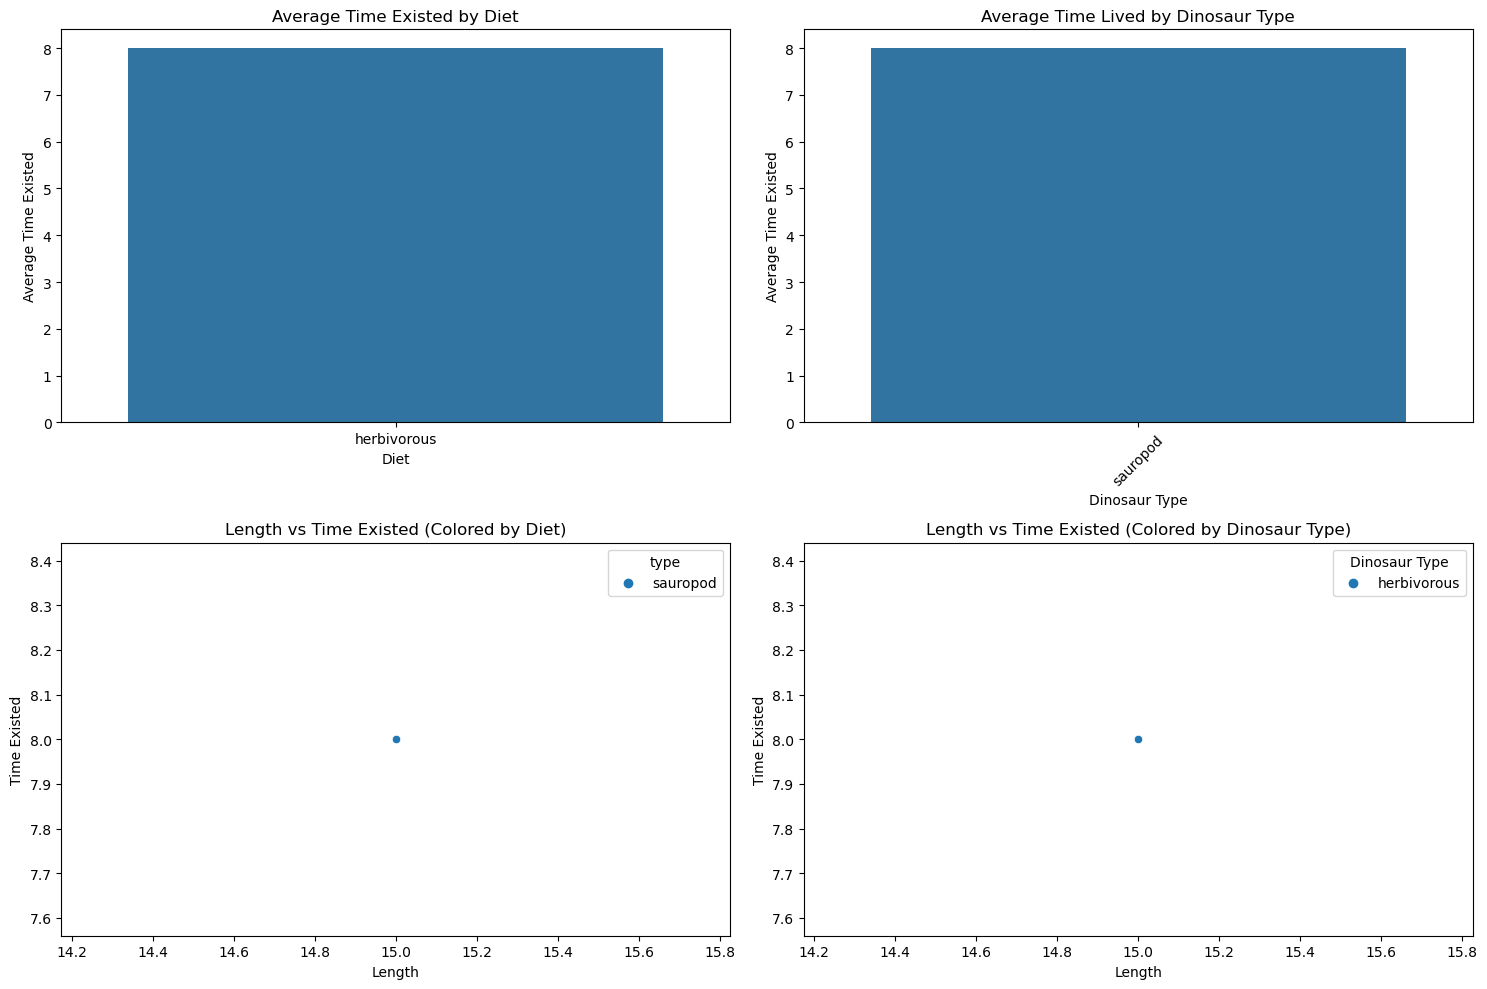

In [18]:
generate_plots('Jurassic', 'Australia')

# Cretaceous Period

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


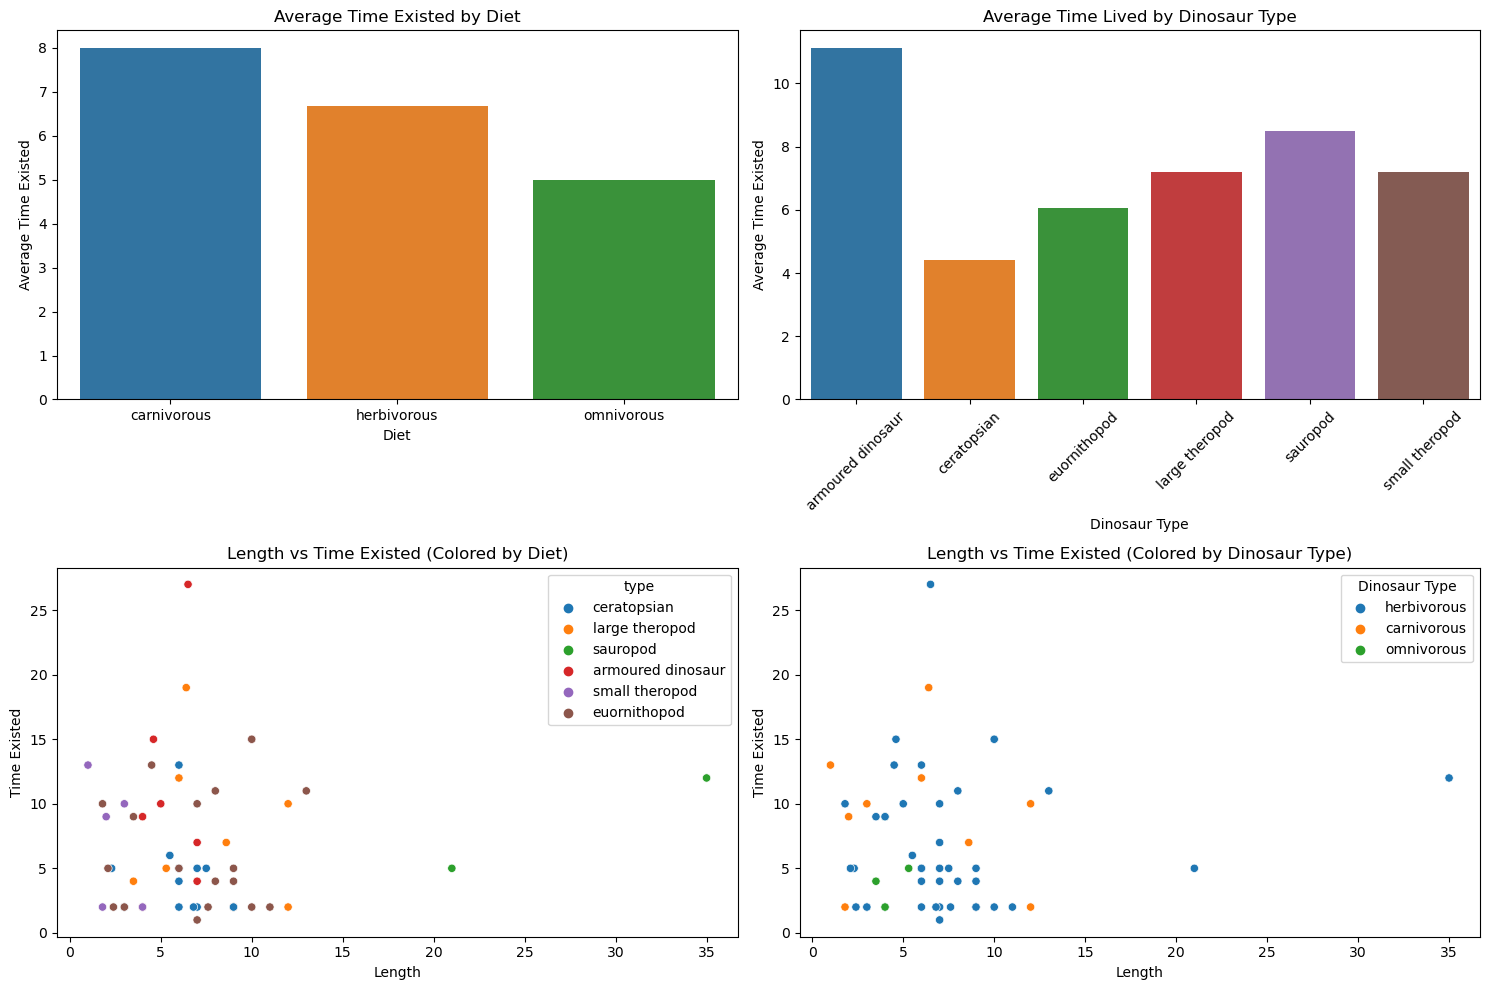

In [19]:
generate_plots('Cretaceous', 'North America')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


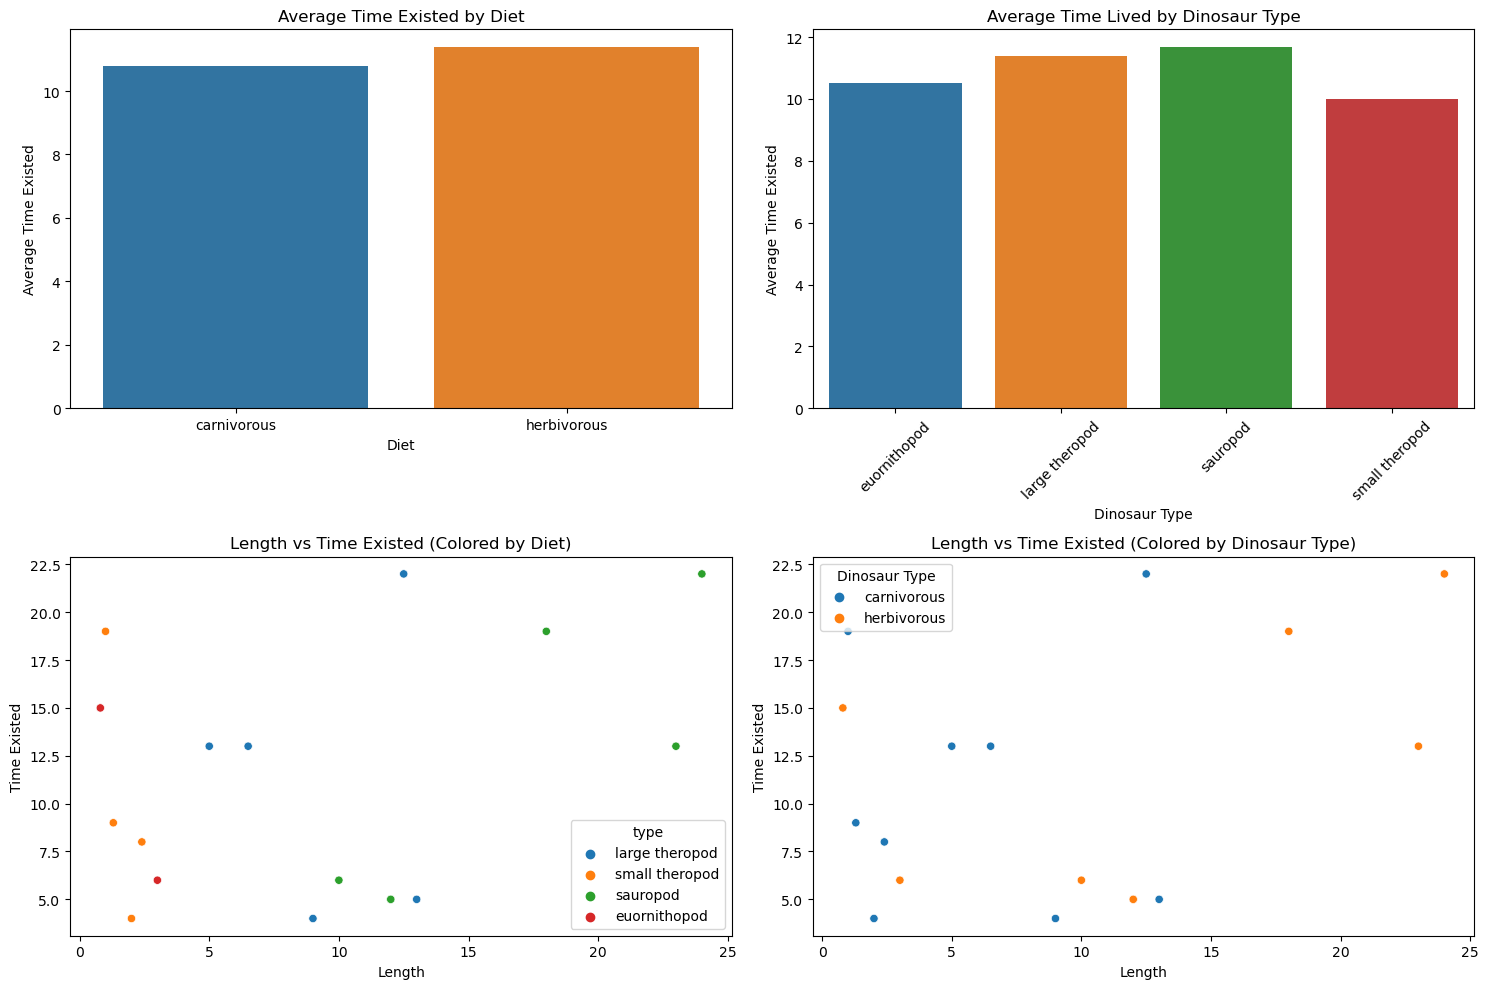

In [20]:
generate_plots('Cretaceous', 'South America')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


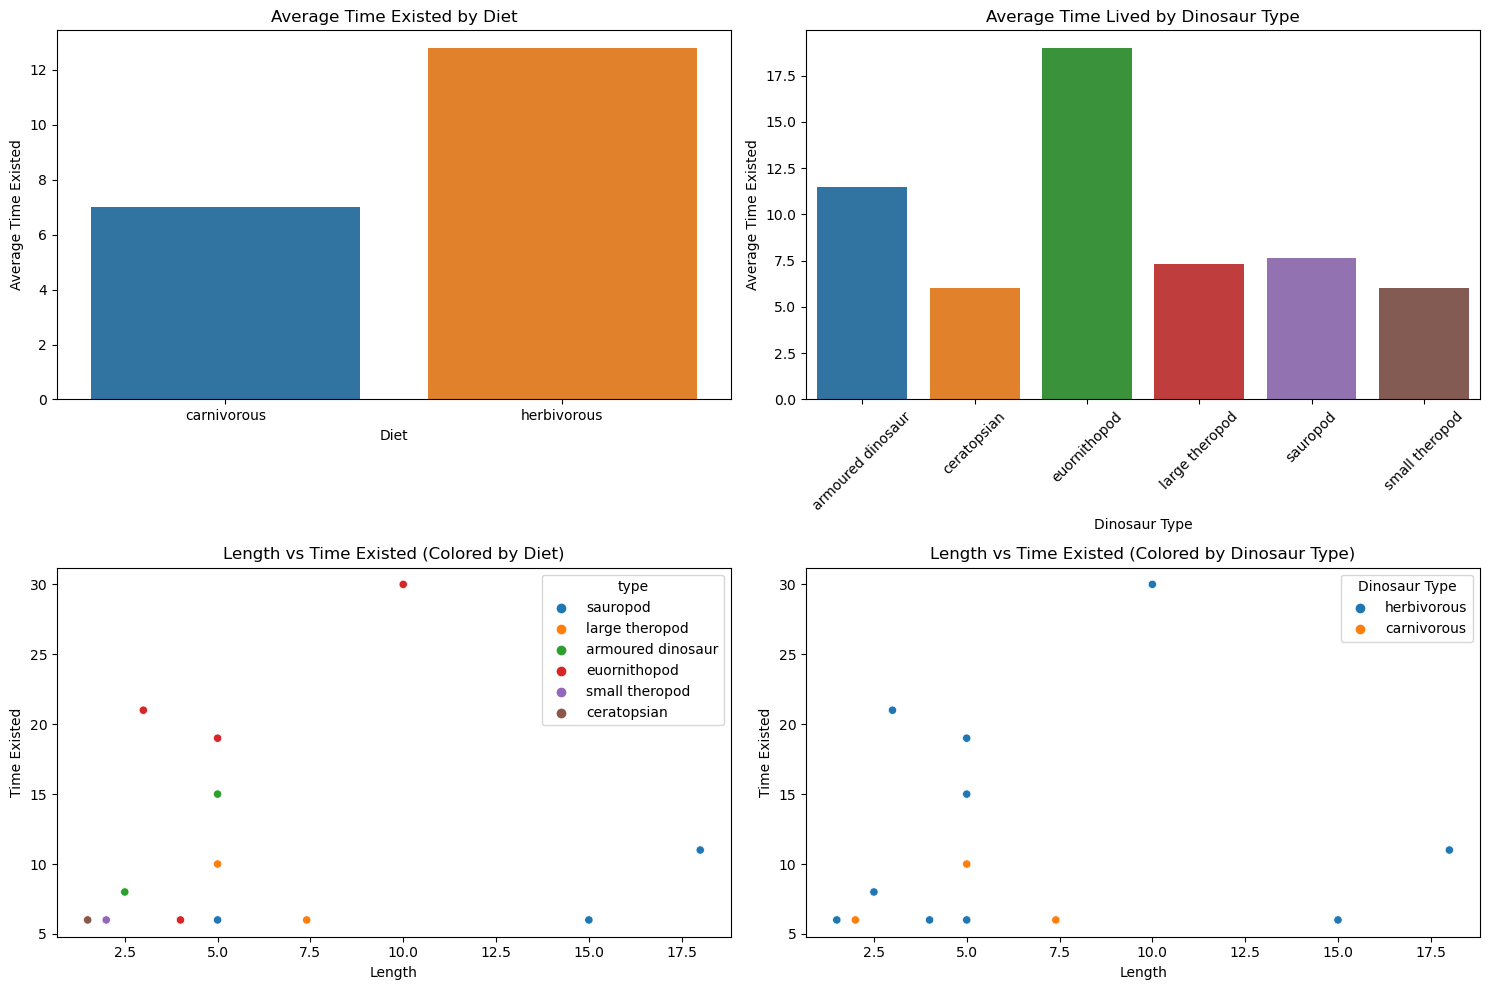

In [21]:
generate_plots('Cretaceous', 'Europe')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


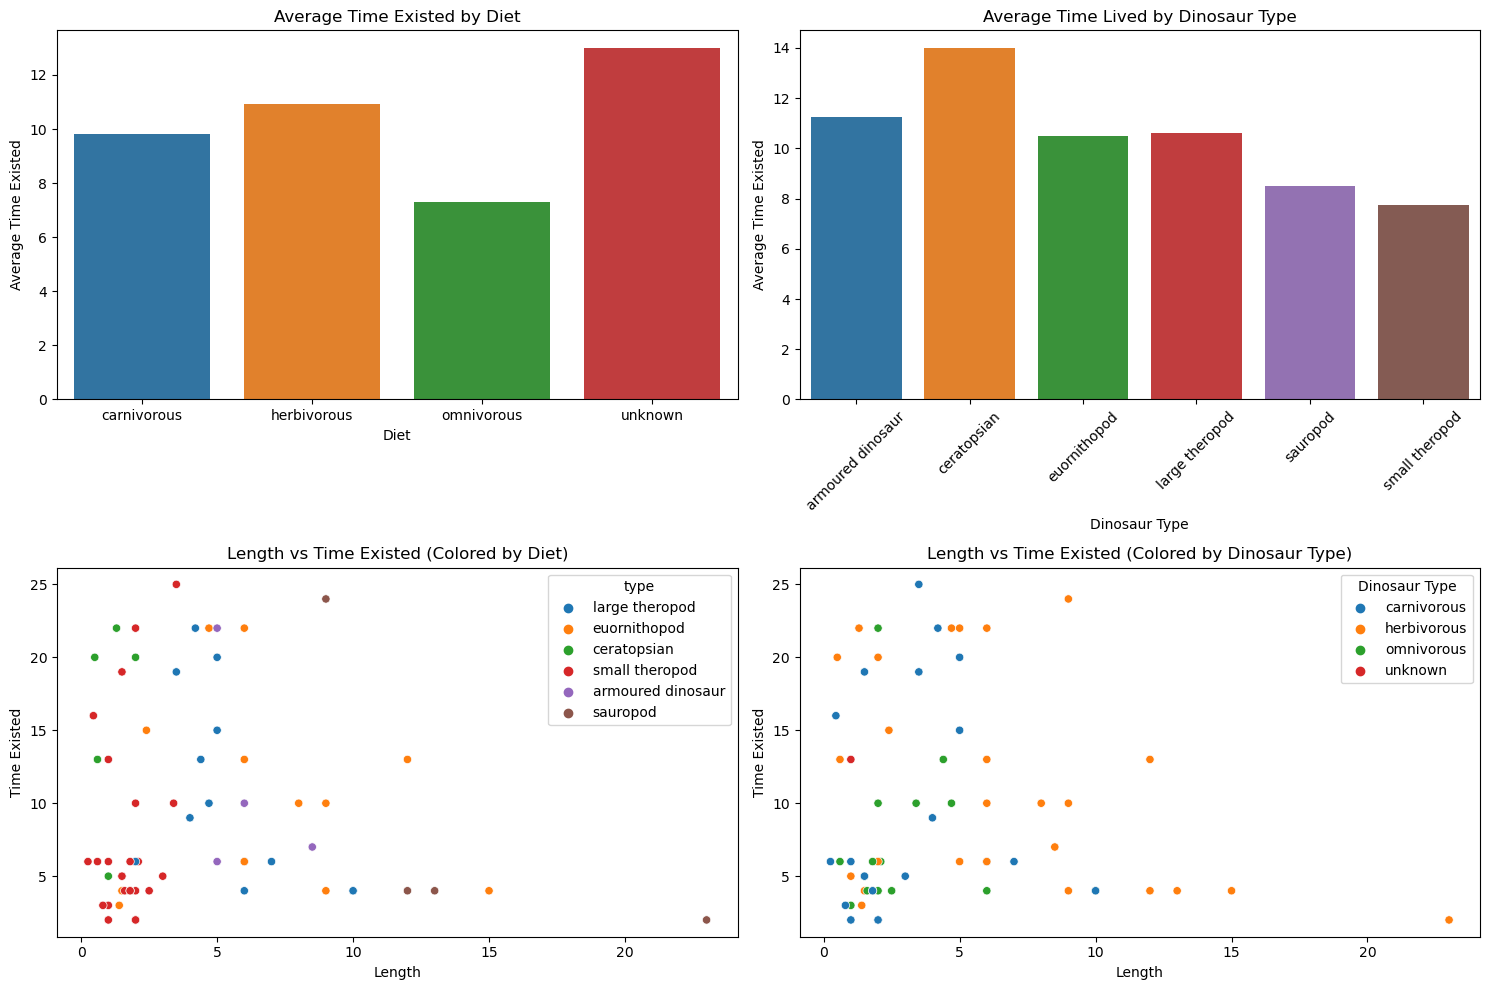

In [22]:
generate_plots('Cretaceous', 'Asia')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


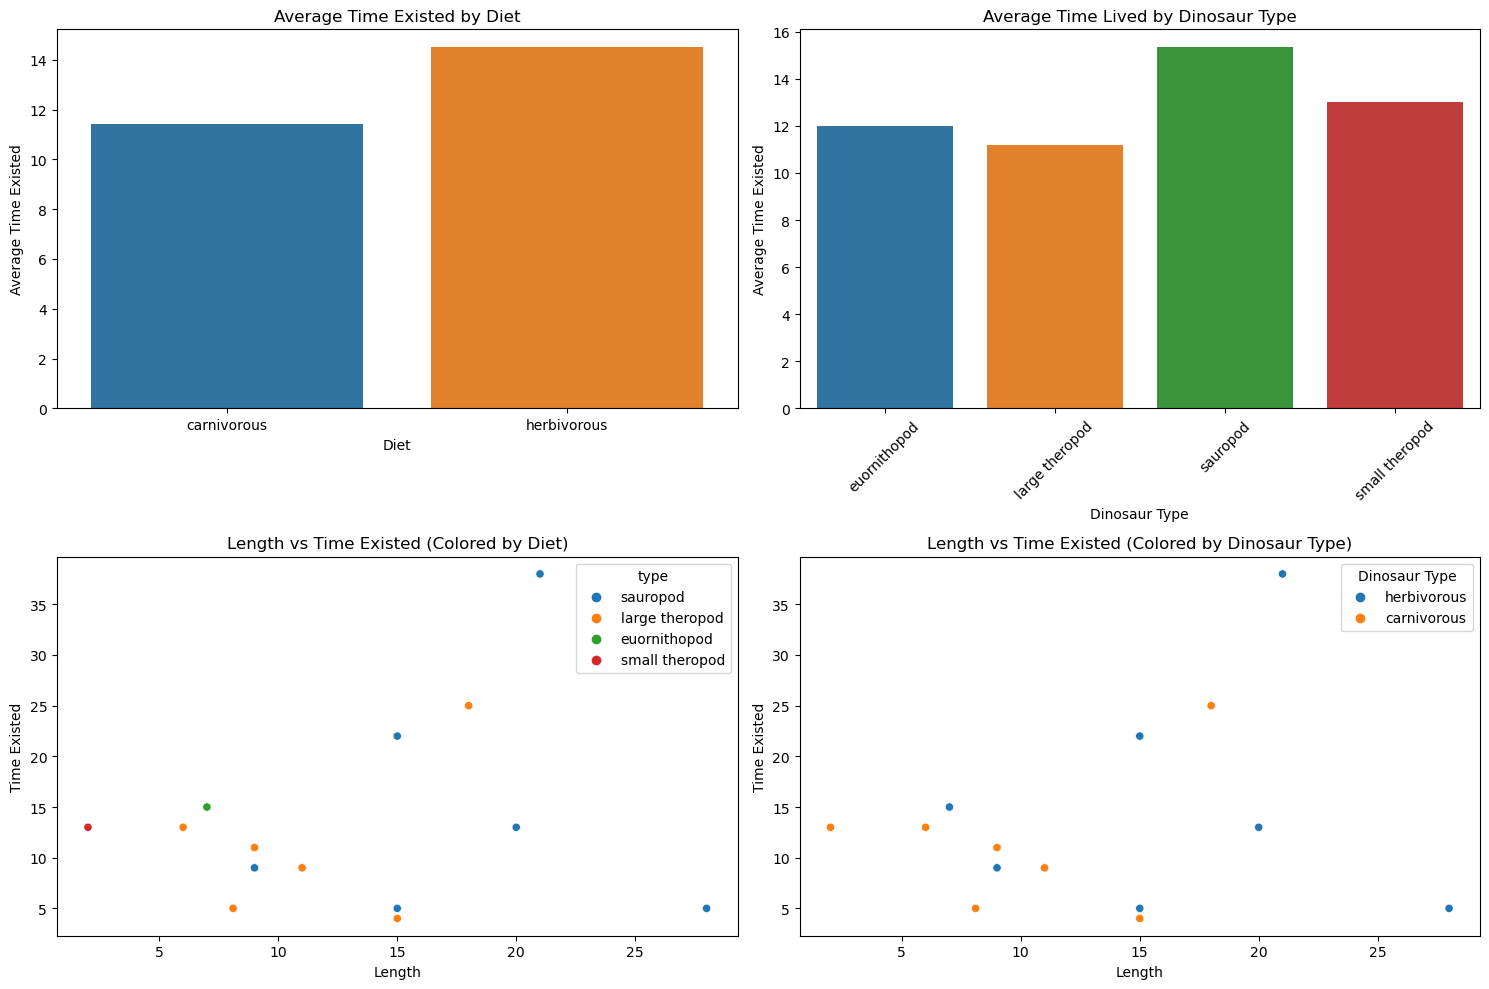

In [23]:
generate_plots('Cretaceous', 'Africa')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


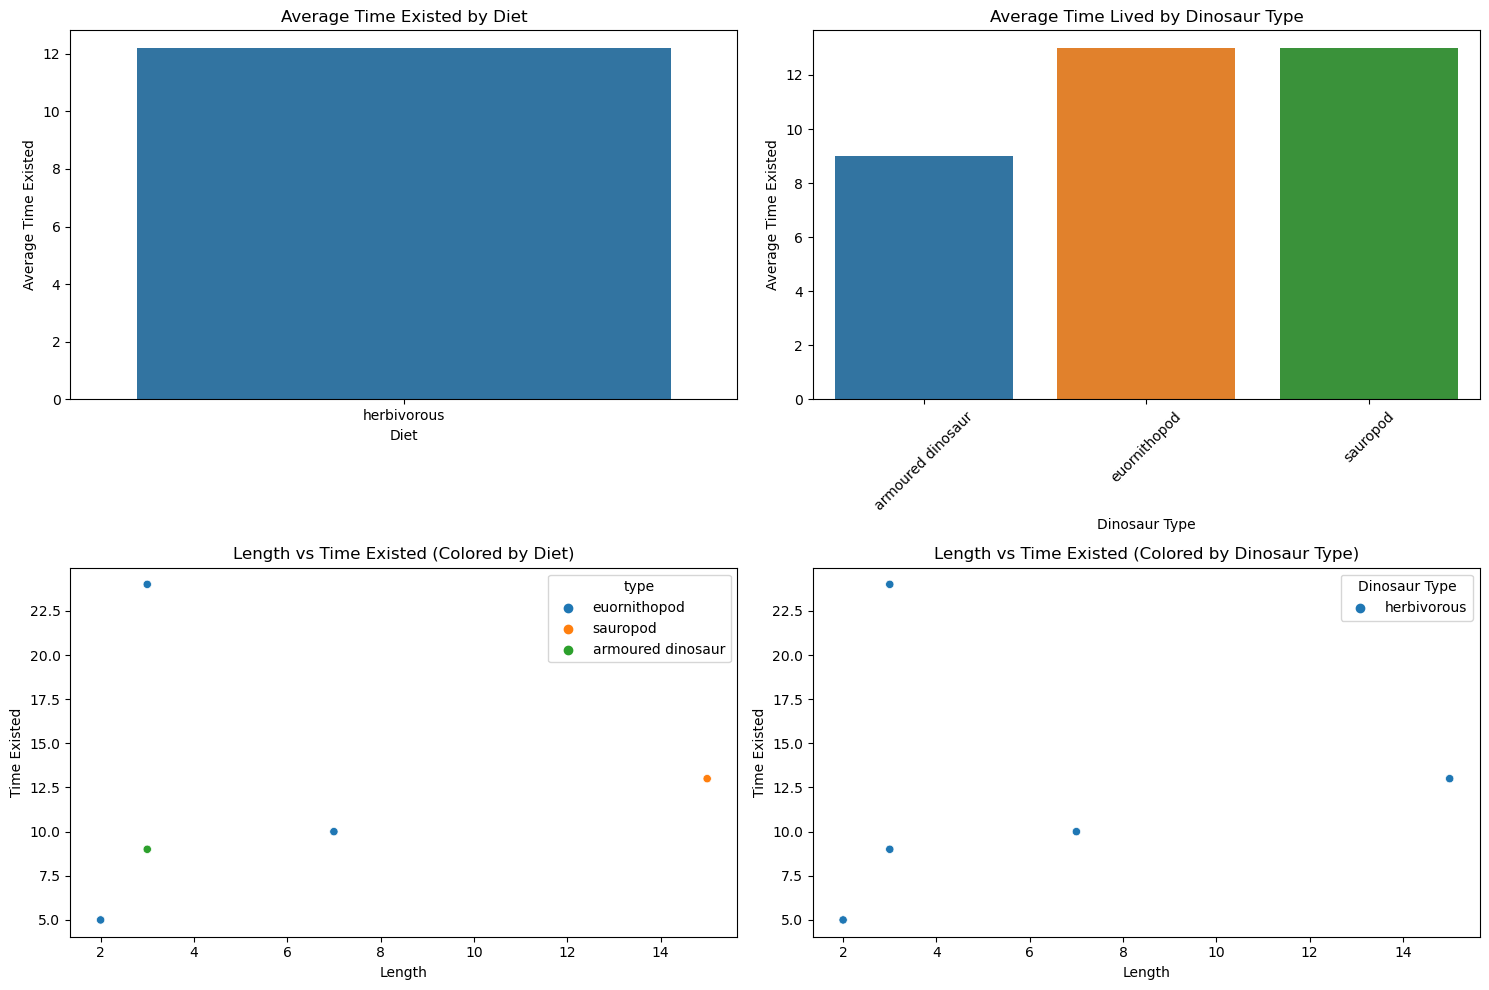

In [24]:
generate_plots('Cretaceous', 'Australia')